# TimeSeries_Trend
 - 시계열 자료를 보는 한가지 관점.
  - 추세 + 계절성 + 자기상관 + 랜덤 워크 

## 추세 
### 추세제거 (detrending)
 - de-trend-ing
![de-trend-ing](2week/2.jpg) 
 
 - 회귀분석
 - 차분(differencing)
 
![diff](2week/1.PNG)
![diff](2week/3.jpg)

### 차분의 장점
 - 간단하다.
 - 추세가 변하더라도 영향을 받지 않는다.
 - 차분을 다시 차분하는 2차 차분, 3차 차분 등을 할 수 있다. 

### 음료 생산 데이터 

In [49]:
bvr = read.csv("2week//beverage.csv")

In [50]:
head(bvr) # 월별 음료 출하량. 

,date,shipment
1,1992-01,3519
2,1992-02,3803
3,1992-03,4332
4,1992-04,4251
5,1992-05,4661
6,1992-06,4811


#### 날짜 변환 

In [51]:
options(repr.plot.height=4)

In [52]:
library(zoo)

In [53]:
bvr$date = as.yearmon(bvr$date)

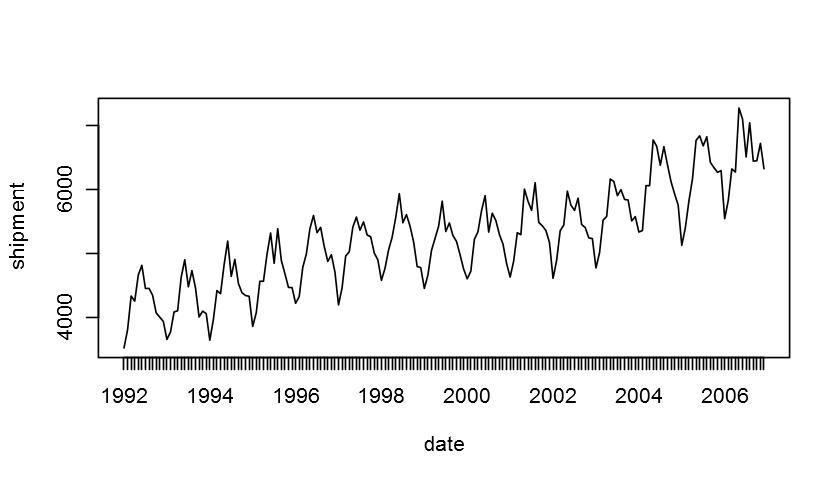

In [54]:
plot(bvr,type="l")

#### 추세선

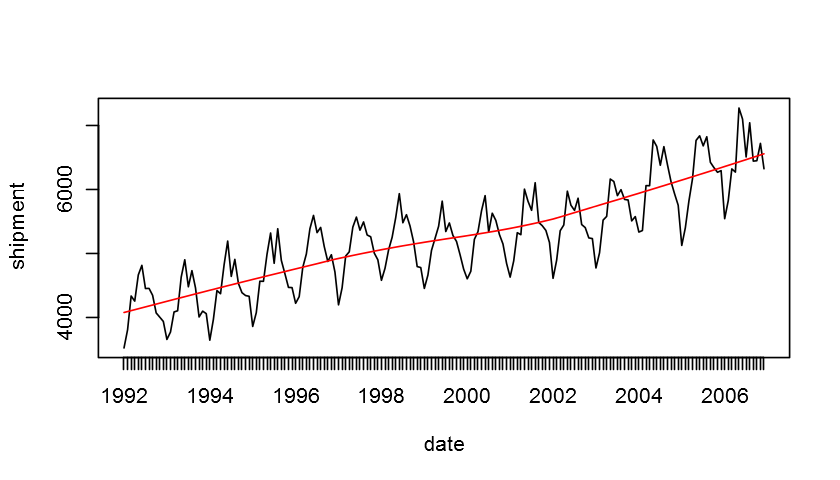

In [55]:
plot(bvr, type='l')
lines(bvr$date, lowess(bvr$shipment)$y, col=2)

 - 전반적으로 Trend가 있어서 앞에게 뒤에거에 영향을 준다고 보고있어서 아래와 같이 나온다. 

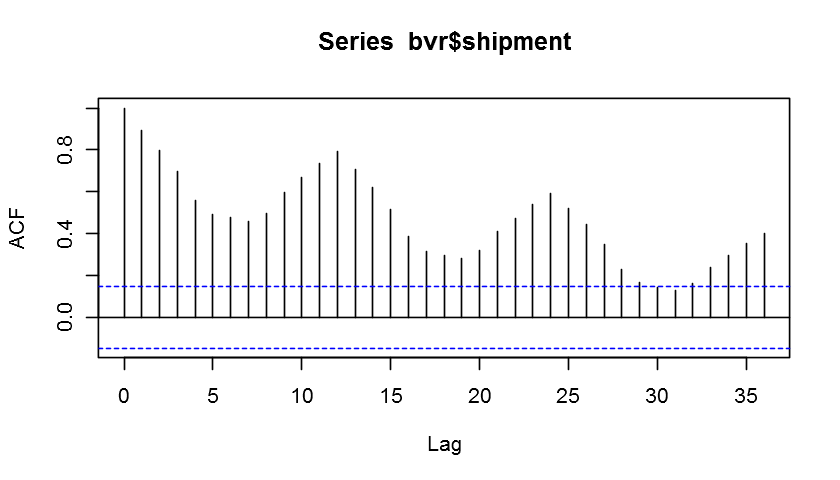

In [56]:
acf(bvr$shipment, 36) # 36개월치 acf를 확인

### 차분 
 - 2차 차분을 하려면 diff -> diff를 한번 더 하면 된다. 

In [57]:
head(bvr)

,date,shipment
1,1992,3519
2,1992.083,3803.000
3,1992.167,4332.000
4,1992.25,4251.00
5,1992.333,4661.000
6,1992.417,4811.000


In [58]:
d1 = diff(bvr$shipment,1) # 기본값이 1 . 1달 간격 (date가 월별로 되어있어서)
d1[1:5]

[1] 284 529 -81 410 150

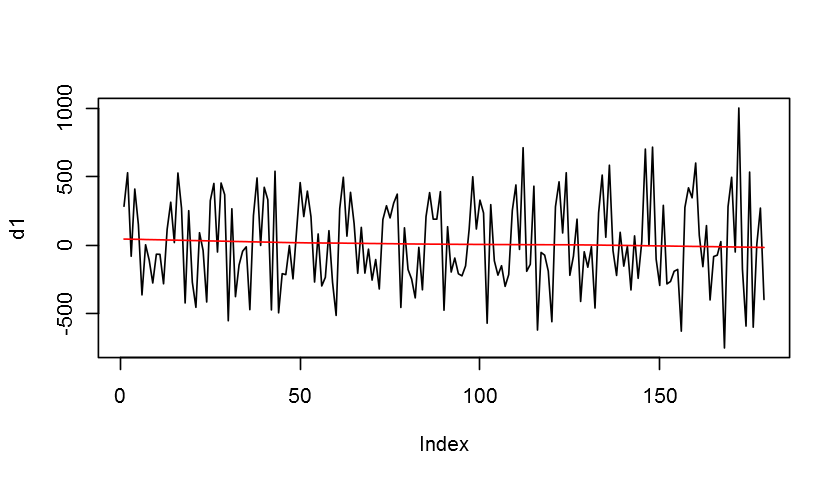

In [59]:
plot(d1, type='l')
lines(lowess(d1), col=2) # 추세를 없애버렸다. 남은 건 계절성, 자기상관 등

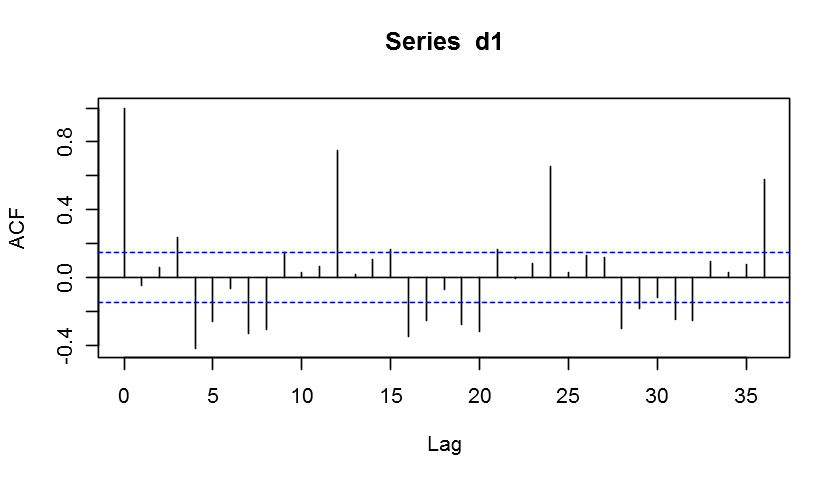

In [60]:
acf(d1, 36) # 12개월 주기로 영향을 주고 있는게 보인다. 계절성이 보인다. 

## 계절성 
### 계절성 차분
 - 계절성도 차분을 통해 제거할 수 있음. 
 - 12개월 주기면 12개월 간격으로 차분한다. 
  - 예) 지난 겨울과 이번 겨울을 빼게되면 변화를 알 수 있다. 
  - 이번 봄 아이스크리 판매량과 이번 여름 판매량을 비교하는 자체가 말이 안됨. 

In [61]:
d12 = diff(bvr$shipment, 12) # 12개월 간격으로 

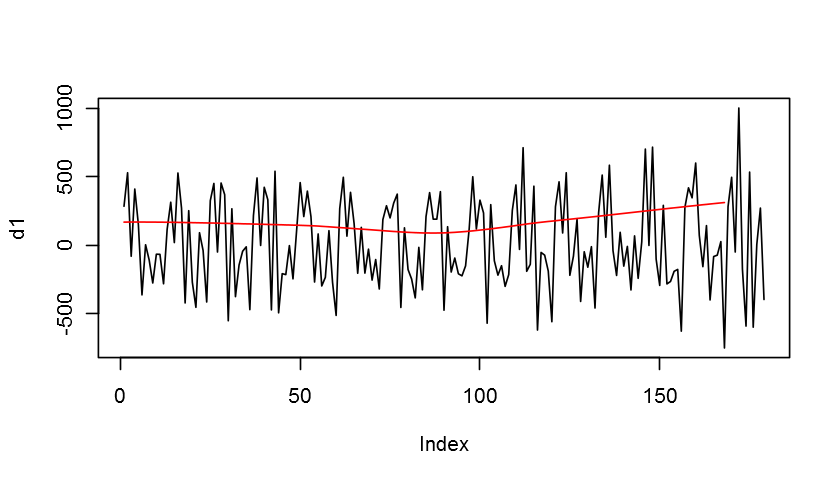

In [62]:
plot(d1, type='l')
lines(lowess(d12), col=2)

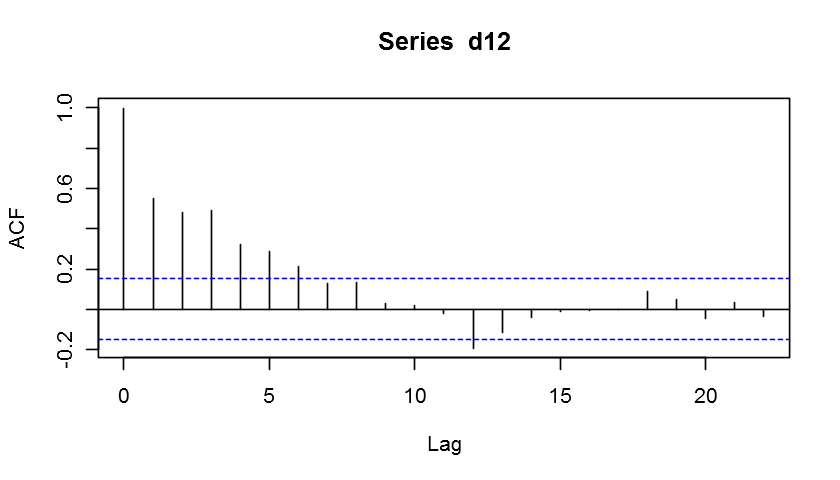

In [63]:
acf(d12)

## 계절성과 추세를 차분
 - 순서는 논리에 따라서 

In [64]:
d121 = diff(d12, 1)

 - 계절성도 추세도 없어진 그래프. 
 - 남은 것은 자기상관이랑 RandomWalk만 남았다. 

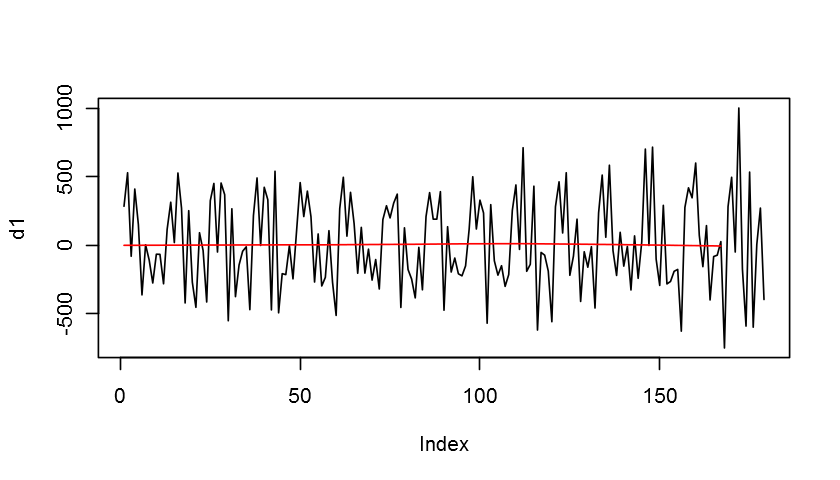

In [65]:
plot(d1, type='l')
lines(lowess(d121), col=2)

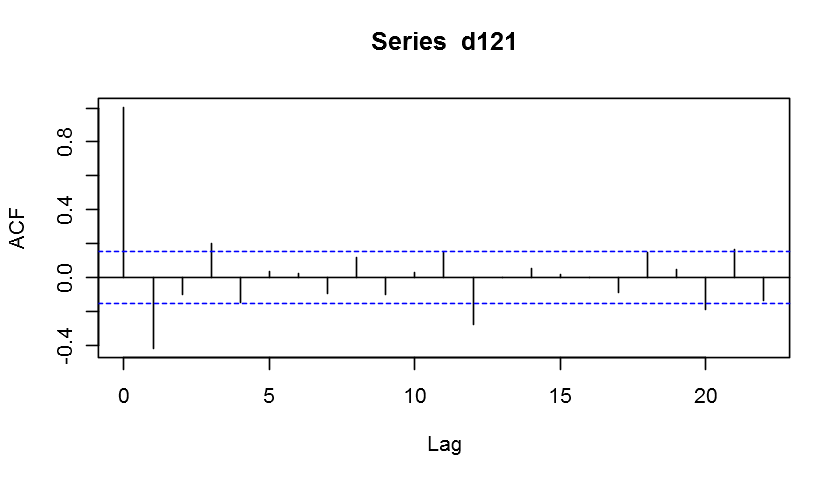

In [66]:
acf(d121)

### BIG PICTURE 
![big](2week/4.jpg)

## Viscosity reading 데이터
 - 공장 데이터 

In [67]:
vis = read.csv('2week/viscosity.csv')

In [68]:
head(vis)

,time,reading
1,1.0000,86.7418
2,2.0000,85.3195
3,3.0000,84.7355
4,4.0000,85.1113
5,5.0000,85.1487
6,6.0000,84.4775


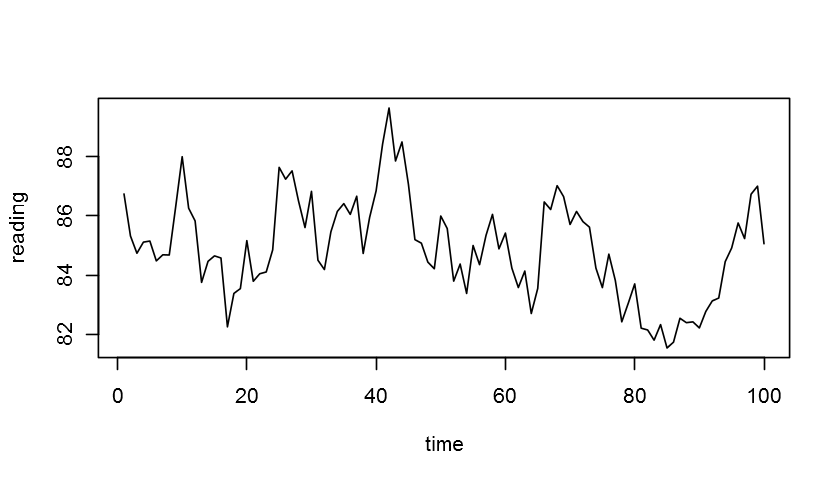

In [69]:
plot(vis, typ='l')

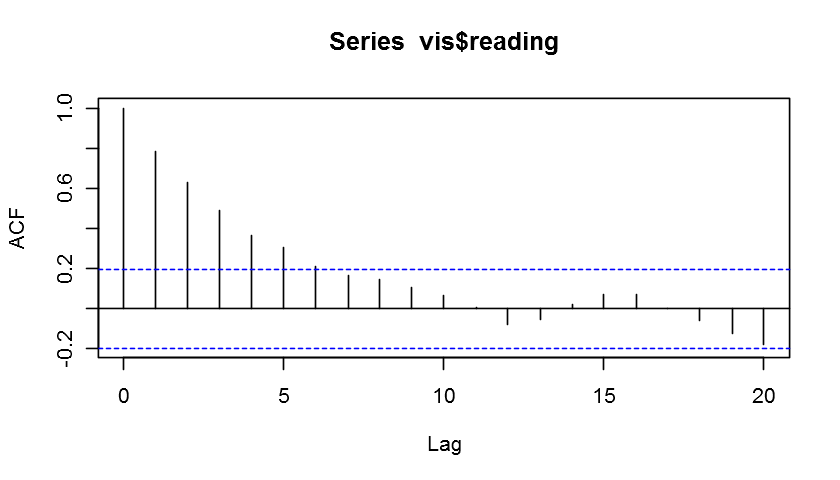

In [70]:
acf(vis$reading) # 자기상관만 있다. 

## MA 모형
 - $\mu$ : 평균
 - $\epsilon_t$ : (오차)
 - $\Theta_1$ : (t-1의 가중치)
 - $\epsilon_(t-1)$ : (이전 시점 t-1의 오차)
 - $y_t$ : 시점 T의 값
 
 $$y_t = \mu + \epsilon_t - \Theta_1\epsilon_(t-1)- ... - \theta_q\epsilon_{t-q}$$
 
 
 - 오래 전 시점의 영향은 사라질 수 있음.
 - 만약 현재 시점에서는 1 시점 이전만 영향을 미친다면 MA(1) 
  - $y_t = \mu + \epsilon_t - \theta_1\epsilon_{t-1}$
 - 만약 1시점, 2시점 이전만영향을 미친다면 MA(2)
 - q는 어떻게 정하는가 -> ACF를 그려본다.

![MA1](2week/2.PNG)
![MA1](2week/3.PNG)

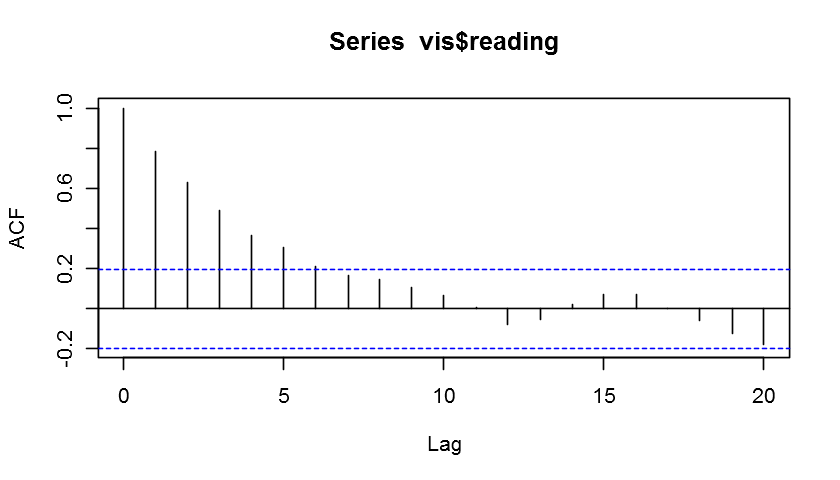

In [71]:
acf(vis$reading) # 첫번째를 제외하고 신뢰구간 이하로 가기 직전까지를 보면 5개 까지만 범위로 본다. 

### MA(q) 모형

In [72]:
vis.ma = arima(vis$reading, c(0,0,5)) # ma가 영향을 미치는 부분을 0,0,$ $에 넣는다. 

In [73]:
vis.ma # ma1~5 숫자를 보면 각 숫자들이 영향을 미치는 강도라고 한다. 


Call:
arima(x = vis$reading, order = c(0, 0, 5))

Coefficients:
         ma1     ma2     ma3     ma4     ma5  intercept
      0.7464  0.6318  0.5020  0.3269  0.3432    84.9470
s.e.  0.0995  0.1073  0.1172  0.1592  0.1418     0.3539

sigma^2 estimated as 1.03:  log likelihood = -144.04,  aic = 302.08

## AR(p) 모형 
 - 앞시점의 값이 현재에 영향을 준다.
  - MA와 차이는 MA는 앞시점과의 차이가 영향을 받는다. 
  
![AR](2week/4.PNG)
![AR](2week/5.PNG)

### AR모형에서 ACF의 문제 
  - MA(q) 모향은 q 이상의 차이가 나면 영향력이 0 
  - AR(p) 모형에서는 AR(1)이라도 영향이 계속 남음.
   - 예) 가중치가 0.8이고 한 번 100으로 올라가면 
   - 100 -> 80 -> 64 ....

## PACF(Partial ACF)
 - X,Y,Z 변수가 있다면 
  - 각각에 영향을 주고 있다.
  - Z를 기준으로 본다면 Z가 영향을 주는 부분을 제외하고 X,Y 서로가 영향을 받는 것을 구하는 것. 
 - 예) 종교시설, 범죄, 인구 3가지가 있다면 종교시설이 많은 지역에 범죄 영향도를 보려고할때 인구에 따른 범죄 영향도도있다 이것을 제거해서 종교시설 -> 범죄영향도를 보려고할때 사용. 
 - 1,2,3월을 볼때, 3월에 보면 1월과 2월 영향도가 다있는데 1월과 3월만 보기 위해서 2월이 3월에 영향을 준것을 빼고 구하는 것.

![PACF](2week/6.PNG)
![PACF](2week/7.PNG)

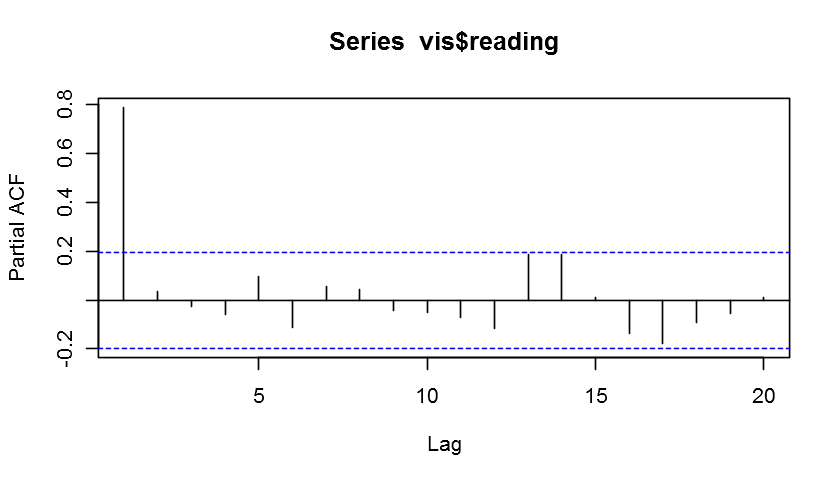

In [74]:
pacf(vis$reading) # 1에서 뚝 떨어지면 AR(1)이다. 

### AR(p) 모형

In [75]:
vis.ar = arima(vis$reading, c(1, 0, 0))

In [76]:
vis.ar


Call:
arima(x = vis$reading, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.7859    84.9827
s.e.  0.0605     0.4649

sigma^2 estimated as 1.061:  log likelihood = -145.32,  aic = 296.64

## ARIMA(p, q) 모형
 - AR 모형과 MA 모형을 합친 것.
 - p 이전 시점까지의 값도 영향을 미치고 
 - q 이전 시점까지의 오차도 영향을 미치는 구조 

In [77]:
vis.arma = arima(vis$reading, c(1, 0, 5))

In [78]:
vis.arma


Call:
arima(x = vis$reading, order = c(1, 0, 5))

Coefficients:
         ar1    ma1     ma2     ma3     ma4     ma5  intercept
      0.2569  0.529  0.4823  0.4053  0.2555  0.3068    84.9526
s.e.  0.2462  0.227  0.1984  0.1931  0.2094  0.1548     0.3963

sigma^2 estimated as 1.018:  log likelihood = -143.47,  aic = 302.94

## 모형비고 
 - MA: ACF 가 q에서 끊기는 형태 ,PACFPACFPACF 는 점점 감소하는 형태
 - AR: ACF 가 점점 감소하는 형태 ,PACFPACFPACF 는 p에서 끊기는 형태
 - ARMA: ACF 와 PACFPACFPACF 가 모두 점점 감소
 
 ![모형](2week/8.PNG)

## 모형 적합도 
 - AIC : 이 모델이 데이터를 얼마나 잘 표현하는가와 복잡하는 가를 합친 값.
 - BIC 도 마찬가지. 
 - AIC 와 BIC : 데이터에 대한 설명력과 모형의 복잡도를 고려
 - 0에 가까울 수록 더 좋은 모형

### AIC 

In [79]:
AIC(vis.ma)

[1] 302.0833

In [80]:
AIC(vis.ar)

[1] 296.6365

In [81]:
AIC(vis.arma)

[1] 302.9441

### BIC

In [83]:
BIC(vis.ma)

[1] 320.3195

In [84]:
BIC(vis.ar)

[1] 304.452

In [85]:
BIC(vis.arma)

[1] 323.7855